# 신경망 모델
##  이진분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense           # Fully Connected Network

In [6]:
model = Sequential([
    Dense(100, input_shape = (30, ),  activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학슴

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2,
                                epochs=100, batch_size=100)

Train on 364 samples, validate on 91 samples
Epoch 1/100
364/364 [==============================] - 2s 5ms/sample - loss: 6.1344 - accuracy: 0.4533 - val_loss: 4.4246 - val_accuracy: 0.3516
Epoch 2/100
364/364 [==============================] - 0s 124us/sample - loss: 2.5238 - accuracy: 0.4918 - val_loss: 1.7591 - val_accuracy: 0.7033
Epoch 3/100
364/364 [==============================] - 0s 159us/sample - loss: 0.9811 - accuracy: 0.7940 - val_loss: 1.0584 - val_accuracy: 0.7143
Epoch 4/100
364/364 [==============================] - 0s 176us/sample - loss: 0.7442 - accuracy: 0.7253 - val_loss: 0.2282 - val_accuracy: 0.9341
Epoch 5/100
364/364 [==============================] - 0s 137us/sample - loss: 0.4312 - accuracy: 0.8984 - val_loss: 0.3110 - val_accuracy: 0.9341
Epoch 6/100
364/364 [==============================] - 0s 143us/sample - loss: 0.1837 - accuracy: 0.9478 - val_loss: 0.6314 - val_accuracy: 0.8022
Epoch 7/100
364/364 [==============================] - 0s 140us/sample - lo

- 모델 평가

In [9]:
model.evaluate(X_test, y_test)

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.29114959689608794, 0.9035088]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [10]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

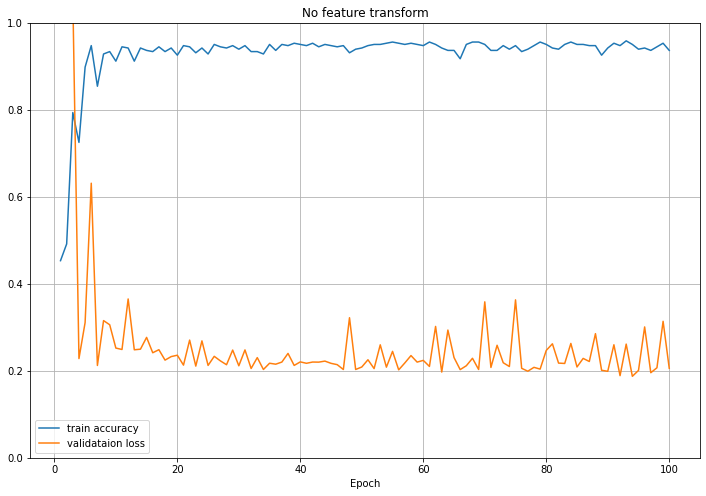

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [12]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

- 모델 정의

In [14]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [16]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [17]:

hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                                epochs=100, batch_size=100)

Train on 364 samples, validate on 91 samples
Epoch 1/100
364/364 [==============================] - 1s 2ms/sample - loss: 0.8443 - accuracy: 0.3077 - val_loss: 0.7192 - val_accuracy: 0.4286
Epoch 2/100
364/364 [==============================] - 0s 55us/sample - loss: 0.6424 - accuracy: 0.5714 - val_loss: 0.5570 - val_accuracy: 0.7473
Epoch 3/100
364/364 [==============================] - 0s 93us/sample - loss: 0.4936 - accuracy: 0.8489 - val_loss: 0.4315 - val_accuracy: 0.9121
Epoch 4/100
364/364 [==============================] - 0s 80us/sample - loss: 0.3824 - accuracy: 0.9148 - val_loss: 0.3396 - val_accuracy: 0.9231
Epoch 5/100
364/364 [==============================] - 0s 63us/sample - loss: 0.3033 - accuracy: 0.9368 - val_loss: 0.2760 - val_accuracy: 0.9341
Epoch 6/100
364/364 [==============================] - 0s 85us/sample - loss: 0.2476 - accuracy: 0.9451 - val_loss: 0.2330 - val_accuracy: 0.9231
Epoch 7/100
364/364 [==============================] - 0s 91us/sample - loss: 0.

- 모델 평가

In [18]:
model2.evaluate(X_test2, y_test2)

114/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0786508604099876, 0.98245615]

- 학습과정 시각화

In [19]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc2)+1)

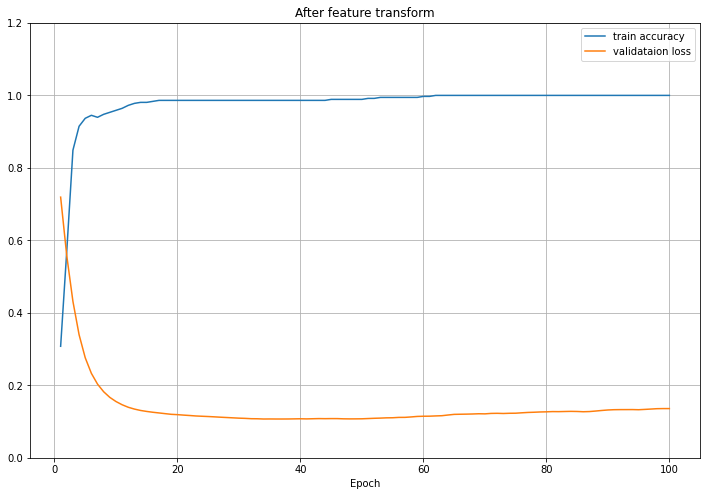

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()